# Data wrangling Project 2
This file is used for exploring and refining the datasets.

Importing Libraries

In [366]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from IPython.display import display
from scipy.stats import ttest_ind, chi2_contingency

# Ignore warnings
warnings.filterwarnings('ignore')

# Loading the datasets

Just with .txt files, without converting it to csv (works perfectly fine)

In [369]:
# Defining the file path 
file_path_client = 'Datasets/Datasets_raw/df_final_experiment_clients.txt'
file_path_fwd1 = 'Datasets/Datasets_raw/df_final_web_data_pt_1.txt'
file_path_fwd2 = 'Datasets/Datasets_raw/df_final_web_data_pt_2.txt'

# Defining the file path for the demo set
file_path_demo = 'Datasets/Datasets_raw/df_final_demo.txt'

# Loading the CSV files into DataFrames
df_client = pd.read_csv(file_path_client)
df_fwd1 = pd.read_csv(file_path_fwd1)
df_fwd2 = pd.read_csv(file_path_fwd2)

# Loading the demo file into Dataframe
df_demo = pd.read_csv(file_path_demo)

## Naming of the dataframes 
Here are all the information about the datasets that are merged together
- df_web = web data 1 and web data 2 merged together 
- df_web_ec = experiment clients data + web d1 + web df2
- df_merged = df start + df demo 

# Exploring the datasets

### Exploring the webdataset  part 1 

In [373]:
# Here I am checking the columns of the dataframes if the first web data file
df_fwd1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [374]:
# df_fwd1.info()
# df_fwd1.head()

### Exploring the webdataset  part 2

In [376]:
# Here I am checking the columns and information of the second web data file
df_fwd2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [377]:
# df_fwd2.info()
# df_fwd2.head()

### Exploring the dataset experiment client 

In [379]:
# Reviewing the dataset client
# df_client

In [380]:
# Here I am checking the columns of the dataframaes of the client file
print(df_client.columns.tolist())

['client_id', 'Variation']


In [381]:
# df_client.info()
# df_client.head()

In [382]:
df_client.columns

Index(['client_id', 'Variation'], dtype='object')

Checking for nulls, shapes and types from all datasets

In [384]:
# # For each DataFrame
# for name, df in [('df_demo', df_demo), ('df_client', df_client), ('df_fwd1', df_fwd1), ('df_fwd2', df_fwd2)]:
#     print(f"\n===== {name} =====")
#     print("\nShape:", df.shape)
#     print("\nColumns and Data Types:\n", df.dtypes)
#     print("\nMissing Values:\n", df.isnull().sum())
#     print("\nPreview:\n", df.head(3))

Merging the file web datasets of 1 and 2 together 

In [386]:
# Merging here the two dataframes of the web data files
df_web = pd.concat([df_fwd1, df_fwd2], ignore_index=True)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [387]:
# Here I am saving the two dataframes of the web data files into one file
df_web.to_csv('Datasets/Datasets_raw/df_web_merged.csv', index=False)

Merging web datasets 1 + 2 and with experiment dataset

In [389]:
# Now I want to merge the web data frames with the experiment client data frame
df_web_ec = pd.merge(df_web, df_client, on='client_id', how='right')
df_web_ec # Reviewing the dataset 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [390]:
# I am saving the dataframes of the web data files with the experiment clients into one file
df_web_ec.to_csv('Datasets/Datasets_raw/df_web_ec.csv', index=False)

In [391]:
print("Total clients in experiment:", df_client['client_id'].nunique()) # Checking here the unique total of the dataset for clients
print("Unique clients in merged web+experiment data:", df_web_ec['client_id'].nunique()) # Checking here the total of the dataset for the merged web data + experiment data files
# The amount is the same so there is no loss of data 

Total clients in experiment: 70609
Unique clients in merged web+experiment data: 70609


In [392]:
df_web_ec.isnull().sum() # Checking to see if we have any nulls.

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation       128522
dtype: int64

In [393]:
df_web_ec[df_web_ec['date_time'].isnull()].shape

(0, 6)

In [394]:
df_web_ec[df_web_ec['date_time'].isnull()] # Checking WHERE the nulls are

,client_id,visitor_id,visit_id,process_step,date_time,Variation


In [395]:
null_indices = df_web_ec[df_web_ec['date_time'].isnull()].index   # there seems 0 nulls 
print(null_indices)   

Index([], dtype='int64')


Checking group sizes

In [397]:
df_web_ec.columns # Checking all the columns of the dataset

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation'],
      dtype='object')

In [398]:
df_web_ec['Variation'].unique() # reviewing how many inputs there are in the coluymn variation

array(['Test', 'Control', nan], dtype=object)

In [399]:
df_web_ec[df_web_ec['Variation'].isnull()] # reviewing how many Nan's we have 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
321309,5459747,927506343_21566395546,126601512_42206463738_739012,confirm,2017-05-22 12:14:45,NaN
321310,5459747,927506343_21566395546,126601512_42206463738_739012,step_3,2017-05-22 12:14:27,NaN
321311,5459747,927506343_21566395546,126601512_42206463738_739012,step_2,2017-05-22 12:14:13,NaN
321312,5459747,927506343_21566395546,126601512_42206463738_739012,step_1,2017-05-22 12:13:50,NaN
321313,5459747,927506343_21566395546,126601512_42206463738_739012,start,2017-05-22 12:13:43,NaN
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [400]:
# Replacing all the Nan of the column 'Variation' into unknown
df_web_ec['Variation'] = df_web_ec['Variation'].fillna('Unknown')

In [401]:
df_web_ec['Variation'].unique()

array(['Test', 'Control', 'Unknown'], dtype=object)

In [402]:
df_web_ec['Variation'].value_counts(normalize=True) # calculating the proportion (relative frequency) of each unique value in the Variation column.

Variation
Test       0.395364
Control    0.318924
Unknown    0.285712
Name: proportion, dtype: float64

Exploring the full funnel process steps

In [404]:
df_web_ec['process_step'].value_counts()

process_step
start      145588
step_1      95896
step_2      79571
step_3      68217
confirm     60559
Name: count, dtype: int64

In [405]:
step_counts = df_web_ec.groupby(['Variation', 'process_step']).size().unstack().fillna(0)
step_counts

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17505,47608,29668,25886,22795
Test,25722,56474,38768,30989,25894
Unknown,17332,41506,27460,22696,19528


Checking how many clients reached 'confirm'

In [407]:
# Here I am assing new variables to review how many confirmed and review if its either with the test or control group
df_confirm = df_web_ec[df_web_ec['process_step'] == 'confirm']
conversion_rates = df_confirm['Variation'].value_counts(normalize=True)
conversion_rates

Variation
Test       0.424743
Control    0.289057
Unknown    0.286200
Name: proportion, dtype: float64

Confirmed / converted per variation group
Variation
Test       42,5%
Control    28,9%
Unknown    28,6%

In [409]:
# these are just raw counts 
df_confirm['Variation'].value_counts()

Variation
Test       25722
Control    17505
Unknown    17332
Name: count, dtype: int64

Completion rate per client

In [411]:
# Dropping here any client ids that are duplicated 
df_confirm_unique = df_confirm.drop_duplicates(subset=['client_id'])
df_confirm_unique['Variation'].value_counts(normalize=True)

Variation
Test       0.390941
Control    0.322887
Unknown    0.286172
Name: proportion, dtype: float64

### Plots 

In [414]:
# Converting date_time to datetime object
df_web_ec['date_time'] = pd.to_datetime(df_web_ec['date_time'])

# Sorting by client, visit and time.
df_web_ec = df_web_ec.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [415]:
# df_web_ec

In [416]:
print(df_web_ec.shape) # number of rows and columns
print(df_web_ec.head()) # first 5 rows
print(df_web_ec.isnull().sum()) # number of missing values in each column

(449831, 6)
        client_id             visitor_id                      visit_id  \
374121        169  201385055_71273495308  749567106_99161211863_557568   
374120        169  201385055_71273495308  749567106_99161211863_557568   
374119        169  201385055_71273495308  749567106_99161211863_557568   
374118        169  201385055_71273495308  749567106_99161211863_557568   
374117        169  201385055_71273495308  749567106_99161211863_557568   

       process_step           date_time Variation  
374121        start 2017-04-12 20:19:36   Unknown  
374120       step_1 2017-04-12 20:19:45   Unknown  
374119       step_2 2017-04-12 20:20:31   Unknown  
374118       step_3 2017-04-12 20:22:05   Unknown  
374117      confirm 2017-04-12 20:23:09   Unknown  
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64


In [417]:
print(df_web_ec.columns.tolist())

['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time', 'Variation']


In [418]:
# Checking for duplicates
duplicates = df_web_ec[df_web_ec.duplicated()]
print("Total duplicated rows:", len(duplicates))

Total duplicated rows: 5934


In [419]:
def remove_duplicates(df):
    '''REMOVING DUPLICATES, 'start' and 'confirm' steps, only keeping the last each visit'''

    df = df_web_ec.copy()

    df_not_started = df[df['process_step'] != 'start']
    filter_start = df[df['process_step'] == 'start'].drop_duplicates(subset=['visit_id'], keep='last')
    df = pd.concat([df_not_started, filter_start])
    df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])

    not_confirm_df = df[df['process_step'] != 'confirm']
    filter_confirm = df[df['process_step'] == 'confirm'].drop_duplicates(subset=['visit_id'], keep='last')

    df = pd.concat([not_confirm_df, filter_confirm])
    df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])
    return(df)

In [420]:
df_web_ec_cleaned = remove_duplicates(df_web_ec)
df_web_ec_cleaned

,client_id,visitor_id,visit_id,process_step,date_time,Variation
374121,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown
374120,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown
374119,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown
374118,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown
374117,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown
...,...,...,...,...,...,...
359300,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown
359299,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown
359298,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown
359297,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown


In [421]:
# # Reviewing the df for duplicates
# duplicates2 = df[df.duplicated()]
# print("Total duplicated rows:", len(duplicates))

Checking df_demo dataset

In [423]:
# df_demo.info()
# df_demo.head()

In [424]:
#Who are the primary clients using this online process?

# Filter for rows where process_step is 'start'
df_start = df_web_ec_cleaned[df_web_ec_cleaned['process_step'].str.lower() == 'start']

# Sort the result by date_time in ascending order
df_sorted = df_start.sort_values(by='date_time', ascending=True)

# Display only client_id and date_time (optional: include more columns if needed)
result = df_sorted[['client_id', 'date_time']]

print(result)

        client_id           date_time
46460     7179755 2017-03-15 00:19:28
104052    4192640 2017-03-15 00:44:38
137482    6752370 2017-03-15 05:43:13
274114    9584408 2017-03-15 06:14:28
228151    2685910 2017-03-15 07:13:47
...           ...                 ...
343771    6506786 2017-06-20 23:28:30
324228    6868690 2017-06-20 23:32:41
337003    2142847 2017-06-20 23:35:24
432569    8295888 2017-06-20 23:43:06
195002    6187864 2017-06-20 23:56:17

[89374 rows x 2 columns]


In [ ]:
#  df_merged

In [ ]:
#  df_start

In [426]:
df_web_ec_cleaned['process_step'].nunique() # 5 in total 

5

In [ ]:
# df_merged.head() # reviewing dataset

In [ ]:
# df_started_p

In [ ]:
# Load the sorted enriched data
df_started_p = pd.read_csv('Datasets/Datasets_clean/clients_started_process_enriched_sorted.csv')

# Set Seaborn style
sns.set(style='whitegrid')

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_started_p, x='clnt_age', y='clnt_tenure_mnth', alpha=0.6)

plt.title('Client Tenure (Months) vs Client Age')
plt.xlabel('Client Age')
plt.ylabel('Client Tenure (Months)')
plt.tight_layout()
plt.savefig('Datasets/Datavisuals/Client_Tenure_Months_vs_Client_Age.png') 
plt.show()

In [ ]:
# df_started_p

In [ ]:
# Histogram of clnt_tenure_mnth
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_started_p['clnt_tenure_mnth'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Client Tenure (Months)')
plt.xlabel('Tenure (Months)')

# Histogram of clnt_age
plt.subplot(1, 2, 2)
sns.histplot(df_started_p['clnt_age'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Client Age')
plt.xlabel('Age')

plt.tight_layout()
plt.savefig('Datasets/Datavisuals/Histogram_of_clnt_tenure_mnth.png')  # Saves as a PNG file
plt.show()

In [ ]:
# Selecting the columns of interest in the df dataframe
cols = ['clnt_age', 'clnt_tenure_mnth']
df_selected = df_started_p[cols]

# Calculate statistics
summary_stats = {
    'Mean': df_started_p[cols].mean(),
    'Standard Deviation': df_started_p[cols].std(),
    'Median': df_started_p[cols].median(),
    'Mode': df_started_p[cols].mode().iloc[0]  # Take first mode if multiple
}

# Convert to a DataFrame for easy viewing
df_stats = pd.DataFrame(summary_stats)
print(df_stats)

In [ ]:
# Select the columns of interest
cols = ['clnt_age', 'clnt_tenure_mnth']
df_demo_selected = df_demo[cols] 

# Calculate statistics
summary_stats = {
    'Mean': df_demo[cols].mean(),
    'Standard Deviation': df_demo[cols].std(),
    'Median': df_demo[cols].median(),
    'Mode': df_demo[cols].mode().iloc[0]  # Take first mode if multiple
}

# Convert to a DataFrame for easy viewing
demo_stats = pd.DataFrame(summary_stats)
print(demo_stats)

In [ ]:
#Completion Rate: The proportion of users who reach the final ‘confirm’ step.

# Total number of unique clients who started the process
total_clients = df_started_p["client_id"].nunique()

# Number of unique clients who reached the 'confirm' step # we had to take the cleaned df_web_ec_cleaned dataset
clients_completed = df_web_ec_cleaned[df_web_ec_cleaned["process_step"] == "confirm"]["client_id"].nunique()

# Calculate completion rate
completion_rate = clients_completed / total_clients

# Display result as a percentage
print(f"Completion Rate: {completion_rate:.2%}")

In [ ]:
df_web_ec_cleaned

In [ ]:
#TIME SPENT ON EACH STEP: The average duration users spend on each step

# Convert date_time to datetime format
df_web_ec_cleaned["date_time"] = pd.to_datetime(df_web_ec_cleaned["date_time"])

# Sort by client_id and date_time
df_web_ec_cleaned = df_web_ec_cleaned.sort_values(by=["client_id", "date_time"])

# Calculate the time spent per step (difference between current and next step for the same user)
df_web_ec_cleaned["time_spent"] = df_web_ec_cleaned.groupby("client_id")["date_time"].diff(-1).abs()

# Shift the process_step column up to associate the time with the current step
df_web_ec_cleaned["next_step"] = df_web_ec_cleaned.groupby("client_id")["process_step"].shift(-1)

# Drop rows where next_step is NaN (i.e., last step) df_web_ec_cleaned = df_web_ec_cleaned.dropna(subset=["next_step", "time_spent"])
# Note Sher: I am commenting this out. A missing next_step might simply mean "the client ended the process" no more steps after.
df_web_ec_cleaned["next_step"] = df_web_ec_cleaned["next_step"].fillna("end")

# Drop rows where time is NaN 
df_web_ec_cleaned = df_web_ec_cleaned.dropna(subset=["time_spent"])

# Calculate average time spent per step
avg_time_per_step = df_web_ec_cleaned.groupby("process_step")["time_spent"].mean()
# Display results
print("Average Time Spent on Each Step:\n")
print(avg_time_per_step)

In [ ]:
# Convert Timedelta to minutes for better readability
avg_time_minutes = avg_time_per_step.dt.total_seconds() / 60

# Plotting
plt.figure(figsize=(10, 6))
avg_time_minutes.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Time Spent on Each Process Step')
plt.xlabel('Process Step')
plt.ylabel('Time Spent (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#ERROR RATE: If there’s a step where users go back to a previous step, it may indicate confusion or an error.

# Step 1: Define step order
step_order = {
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
}

#Step 2: Map steps to numeric order
df_web_ec_cleaned['step_num'] = df_web_ec_cleaned['process_step'].map(step_order)

#Step 3: Sort the dataframe by client and time
df_web_ec_cleaned = df_web_ec_cleaned.sort_values(by=['client_id', 'date_time'])

#Step 4: Detect backward movement for each client
# For each client, compute the difference between consecutive steps
df_web_ec_cleaned['step_diff'] = df_web_ec_cleaned.groupby('client_id')['step_num'].diff()

# Identify backward steps (negative diffs)
df_web_ec_cleaned['is_error'] = df_web_ec_cleaned['step_diff'] < 0

#Step 5: Calculate the error rate

# Find clients who made at least one error
clients_with_error = df_web_ec_cleaned[df_web_ec_cleaned['is_error'] == True]['client_id'].unique()

# Total unique clients
total_clients = df_web_ec_cleaned['client_id'].nunique()

# Error rate in %
error_rate = len(clients_with_error) / total_clients * 100

print(f"Error rate: {error_rate:.2f}%")

df_web_ec_cleaned

- Based on the chosen KPIs, how does the new design’s performance compare to the old one?
- Another analysis: the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
- An A/B test was set into motion from 3/15/2017 to 6/20/2017 by the team.

- Control Group: Clients interacted with Vanguard’s traditional online process.
- Test Group: Clients experienced the new, spruced-up digital interface.

In [ ]:
# Step order mapping
step_order = {
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
}
df_web_ec_cleaned['step_num'] = df_web_ec_cleaned['process_step'].map(step_order)

# Sort for time-based computations
df_web_ec_cleaned = df_web_ec_cleaned.sort_values(by=['client_id', 'date_time'])


#Step 1. Completion Rate (reached "confirm")
completion = (
    df_web_ec_cleaned[df_web_ec_cleaned['process_step'] == 'confirm']
    .groupby('Variation')['client_id']
    .nunique()
    / df_web_ec.groupby('Variation')['client_id'].nunique()
    * 100
).round(2)

print("*Completion Rate (%) :")
print(completion)

In [ ]:
#Step 2. Average Time Spent on Each Step (per group)

# Time difference per client between steps
df_web_ec_cleaned['next_time'] = df_web_ec_cleaned.groupby(['client_id'])['date_time'].shift(-1)
df_web_ec_cleaned['step_time'] = (df_web_ec_cleaned['next_time'] - df_web_ec_cleaned['date_time']).dt.total_seconds()

# Only keep time spent on valid steps (i.e., exclude last rows per client)
df_step_time = df_web_ec_cleaned.dropna(subset=['step_time'])

# Average time spent on each step per group
avg_time = df_step_time.groupby(['Variation', 'process_step'])['step_time'].mean().round(2).unstack(0)

print("*Average Time Spent per Step (in seconds)")
print(avg_time)

In [ ]:
# Defining here a function to convert seconds to H:M:S

def convert_seconds_to_dhms(seconds):
    if pd.isna(seconds):
        return 'N/A'
    seconds = int(seconds)
    days = seconds // 86400
    hours = (seconds % 86400) // 3600
    minutes = (seconds % 3600) // 60
    secs = seconds % 60
    if days > 0:
        return f"{days}d {hours}h {minutes}m {secs}s"
    else:
        return f"{hours}h {minutes}m {secs}s"

# Apply it
avg_time_dhms = avg_time.applymap(convert_seconds_to_dhms)

# Show result
print("*Average Time Spent per Step (in days:hours:minutes:seconds)")
print(avg_time_dhms)


In [ ]:
avg_time_dhms_reset = avg_time_dhms.reset_index()
avg_time_dhms_reset

# Save to CSV
avg_time_dhms_reset.to_csv('Datasets/Datasets_clean/avg_time_per_step_dhms.csv', index=False)

In [ ]:
#Step 3. Error Rate (backward movement per group)

# Compute step diff per client
df_web_ec_cleaned['step_diff'] = df_web_ec_cleaned.groupby('client_id')['step_num'].diff()
df_web_ec_cleaned['is_error'] = df_web_ec_cleaned['step_diff'] < 0

# Clients with at least one error per group
error_clients = df_web_ec_cleaned[df_web_ec_cleaned['is_error']].groupby('Variation')['client_id'].nunique()

# Total clients per group
total_clients_group = df_web_ec_cleaned.groupby('Variation')['client_id'].nunique()

# Error rate
error_rate = (error_clients / total_clients_group * 100).round(2)

print("*Error Rate (%)")
print(error_rate)

In [ ]:
# merged_df

In [ ]:
df_demo.isna().sum()

In [ ]:
#df_demo[df_demo['clnt_tenure_yr'].isna()] # columns showing NaN values 

In [ ]:
df_demo.dropna(axis=0, how='any', inplace=True) # dropping all of these Nan values

In [ ]:
df_demo.isna().sum()

In [ ]:
df_demo.to_csv('Datasets/Datasets_clean/df_demo_cleaned.csv', index=False) # saving the cleaned demo file

In [438]:
#You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process.

# Step 1: Filter only customers who started the process
started_clients = df_web_ec_cleaned[df_web_ec_cleaned['process_step'] == 'start'][['client_id', 'Variation']].drop_duplicates()

# Step 2: Merge with demographic data
merged_df = pd.merge(started_clients, df_demo[['client_id', 'clnt_age']], on='client_id', how='left')

# Step 3: Compute average age per Variation group
avg_age = merged_df.groupby('Variation')['clnt_age'].mean().round(2)

# Step 4: Display the results
print(f"The Test group's average age is {avg_age.get('Test', 'N/A')} years. The Control group's average age is {avg_age.get('Control', 'N/A')} years.")

The Test group's average age is 47.06 years. The Control group's average age is 47.5 years.


The Test group's average age is 47.15 years. The Control group's average age is 47.5 years.

In [428]:
#You might want to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process

# Step 1: Get unique clients and their Variation group from df_web_ec
variation_df = df_web_ec_cleaned[['client_id', 'Variation']].drop_duplicates()

# Step 2: Merge with df_demo to get tenure
merged_df = pd.merge(variation_df, df_demo[['client_id', 'clnt_tenure_yr']], on='client_id', how='inner')

# Step 3: Drop missing values
merged_df = merged_df.dropna(subset=['clnt_tenure_yr'])

# Step 4: Split into test and control groups
test_group = merged_df[merged_df['Variation'] == 'Test']['clnt_tenure_yr']
control_group = merged_df[merged_df['Variation'] == 'Control']['clnt_tenure_yr']

# Step 5: Perform independent t-test (Welch’s t-test for safety)
t_stat, p_val = ttest_ind(test_group, control_group, equal_var=False)

# Step 6: Display the result
print(f"T-statistic = {t_stat:.2f}, P-value = {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in client tenure between the Test and Control groups.")
else:
    print("No significant difference in client tenure between the Test and Control groups.")

T-statistic = -1.72, P-value = 0.0854
No significant difference in client tenure between the Test and Control groups.


T-statistic = -1.71, P-value = 0.0870
No significant difference in client tenure between the Test and Control groups.

In [ ]:
sns.boxplot(data=merged_df, x='Variation', y='clnt_tenure_yr', palette='pastel')
plt.title("Client Tenure by Variation Group")
plt.xlabel("Group")
plt.ylabel("Tenure (Years)")
plt.show()

In [430]:
#You might want to test if there are gender differences that affect engaging with the new or old process

# Step 1: Get one row per client with their group (Variation)
variation_df = df_web_ec[['client_id', 'Variation']].drop_duplicates()

# Step 2: Merge with df_demo to get gender
merged_df = pd.merge(variation_df, df_demo[['client_id', 'gendr']], on='client_id', how='inner')

# Step 3: Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(merged_df['gendr'], merged_df['Variation'])

# Step 4: Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Display results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-squared = {chi2:.2f}, P-value = {p:.4f}, Degrees of freedom = {dof}")

if p < 0.05:
    print("There is a significant association between gender and process variation assignment.")
else:
    print("No significant association between gender and process variation assignment.")

Contingency Table:
 Variation  Control  Test  Unknown
gendr                            
F             7543  8716     6487
M             7970  8977     6777
U             8014  9266     6842
X                0     2        1

Chi-squared = 3.80, P-value = 0.7036, Degrees of freedom = 6
No significant association between gender and process variation assignment.


Contingency Table:
 Variation  Control  Test  Unknown
gendr                            
F             7543  8716     6487
M             7970  8977     6777
U             8014  9266     6842
X                0     2        1

Chi-squared = 3.80, P-value = 0.7036, Degrees of freedom = 6
No significant association between gender and process variation assignment.

In [ ]:
# Save to CSV
df_web_ec_cleaned.to_csv('Datasets/Datasets_clean/df_web_ec_cleaned.csv', index=False)

In [ ]:
#Hypothesis Testing: Completion Rate
#H0:The completion rates are the same in the Test and Control groups.
#H1:The Test group has a higher completion rate than the Control group.

In [432]:
merged_df

,client_id,Variation,gendr
0,169,Unknown,M
1,555,Test,U
2,647,Test,M
3,722,Unknown,F
4,934,Test,F
...,...,...,...
70604,9999400,Test,U
70605,9999626,Test,M
70606,9999729,Test,F
70607,9999832,Test,F


In [434]:
variation_df

,client_id,Variation
374121,169,Unknown
94261,555,Test
180548,647,Test
321616,722,Unknown
81938,934,Test
...,...,...
237234,9999400,Test
248212,9999626,Test
140279,9999729,Test
14818,9999832,Test


In [440]:
df_web_ec_cleaned

,client_id,visitor_id,visit_id,process_step,date_time,Variation
374121,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown
374120,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown
374119,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown
374118,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown
374117,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown
...,...,...,...,...,...,...
359300,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown
359299,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown
359298,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown
359297,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown


In [446]:
df_web_ec_cleaned['Variation'].unique()

array(['Unknown', 'Test', 'Control'], dtype=object)

In [448]:
df = df_web_ec_cleaned[['client_id', 'Variation', 'process_step']].drop_duplicates()
df

,client_id,Variation,process_step
374121,169,Unknown,start
374120,169,Unknown,step_1
374119,169,Unknown,step_2
374118,169,Unknown,step_3
374117,169,Unknown,confirm
...,...,...,...
359300,9999839,Unknown,start
359299,9999839,Unknown,step_1
359298,9999839,Unknown,step_2
359297,9999839,Unknown,step_3


In [450]:
started = df[df['process_step'] == 'start']
start_counts = started['Variation'].value_counts()

# Count how many clients confirmed (we assume 'confirm' means process was completed)
confirmed = df[df['process_step'] == 'confirm']
confirm_counts = confirmed['Variation'].value_counts()

# Extract numbers for Test and Control (ignore NaN/Unknown group for hypothesis test)
x_test = confirm_counts.get('Test', 0)
n_test = start_counts.get('Test', 0)

x_control = confirm_counts.get('Control', 0)
n_control = start_counts.get('Control', 0)

print(f"Test completions: {x_test} / {n_test}")
print(f"Control completions: {x_control} / {n_control}")

Test completions: 18552 / 26545
Control completions: 15309 / 23274


In [ ]:
#H0:The increase in completion rate from the new UI (Test group) is less than 5% compared to the old UI (Control group).
#h1:The increase in completion rate from the new UI (Test group) is at least 5% compared to the old UI (Control group).


In [452]:
from statsmodels.stats.proportion import proportions_ztest

# Number of successes and observations
successes = [x_test, x_control]
observations = [n_test, n_control]

# Perform the one-tailed z-test (H1: Test > Control)
z_stat, p_value = proportions_ztest(count=successes, nobs=observations, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
#There is a statistically significant difference in completion rates between the Test and Control groups. 
#Specifically, the Test group has a significantly higher completion rate than the Control group.

Z-statistic: 9.8129
P-value: 0.0000


In [454]:
#
completion_rate_test = x_test / n_test
completion_rate_control = x_control / n_control
improvement = completion_rate_test - completion_rate_control

print(f"Test group completion rate: {completion_rate_test:.4%}")
print(f"Control group completion rate: {completion_rate_control:.4%}")
print(f"Absolute improvement: {improvement:.4%}")


Test group completion rate: 69.8889%
Control group completion rate: 65.7773%
Absolute improvement: 4.1116%


In [456]:
threshold = 0.05  # 5%

if improvement >= threshold:
    print("✅ The improvement exceeds the 5% threshold. The new design is cost-effective.")
else:
    print("❌ The improvement does not meet the 5% threshold. The new design may not be justified.")


❌ The improvement does not meet the 5% threshold. The new design may not be justified.


In [458]:
from statsmodels.stats.proportion import proportions_ztest

# Your data
successes = [x_test, x_control]
observations = [n_test, n_control]

# Vanguard threshold (5%)
min_effect = 0.05

# Run a one-sided z-test against a null difference of 5%
z_stat, p_value = proportions_ztest(
    count=successes,
    nobs=observations,
    value=min_effect,  # Test against 5% improvement instead of 0%
    alternative='larger'  # One-sided: test if observed difference > 5%
)

print(f"Z-statistic vs 5% threshold: {z_stat:.4f}")
print(f"P-value vs 5% threshold: {p_value:.4f}")


Z-statistic vs 5% threshold: -2.1203
P-value vs 5% threshold: 0.9830


In [482]:
df_merged = df_web_ec_cleaned.merge(df_demo, on='client_id', how='inner')

In [ ]:
#Hypothesis 3: 
#H0:The average tenure is the same between Control and Test groups.
#H1:The average tenure is different between Control and Test groups.

In [484]:
df_merged

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385774,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown,13.0,160.0,28.5,F,2.0,67425.35,3.0,3.0
385775,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown,13.0,160.0,28.5,F,2.0,67425.35,3.0,3.0
385776,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown,13.0,160.0,28.5,F,2.0,67425.35,3.0,3.0
385777,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown,13.0,160.0,28.5,F,2.0,67425.35,3.0,3.0


In [486]:
df_merged_unique = df_merged.drop_duplicates(subset='client_id')

In [488]:
from scipy.stats import ttest_ind

# Filter to Test and Control only
filtered = df_merged_unique[df_merged_unique['Variation'].isin(['Test', 'Control'])]

# Separate tenure values
tenure_test = filtered[filtered['Variation'] == 'Test']['clnt_tenure_yr'].dropna()
tenure_control = filtered[filtered['Variation'] == 'Control']['clnt_tenure_yr'].dropna()

# Run two-sample t-test (equal_var=False for Welch’s t-test, safer when variances may differ)
t_stat, p_value = ttest_ind(tenure_test, tenure_control, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -1.7204
P-value: 0.0854


In [492]:
#h0: the gender distribution is balanced between Test and Control Group.
import pandas as pd
from scipy.stats import chi2_contingency

# Only keep Test and Control
filtered = df_merged_unique[df_merged_unique['Variation'].isin(['Test', 'Control'])]

# Create a contingency table
contingency_table = pd.crosstab(filtered['Variation'], filtered['gendr'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("There is a significant association between gender and process variation assignment.")
else:
    print("No significant association between gender and process variation assignment.")


Contingency Table:
gendr         F     M     U  X
Variation                     
Control    7542  7970  8012  0
Test       8715  8977  9266  2

Chi-square statistic: 3.6439
P-value: 0.3026
No significant association between gender and process variation assignment.


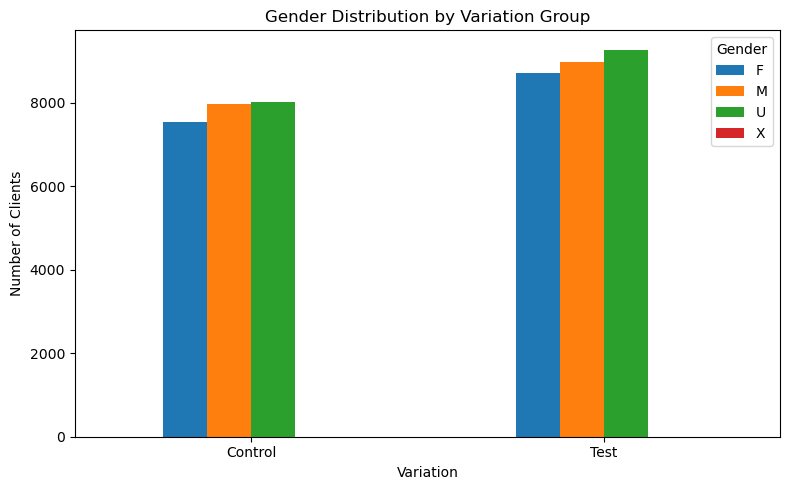

In [494]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to Test and Control
filtered = df_merged_unique[df_merged_unique['Variation'].isin(['Test', 'Control'])]

# Create the contingency table
gender_counts = pd.crosstab(filtered['Variation'], filtered['gendr'])

# Plot
gender_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Gender Distribution by Variation Group')
plt.xlabel('Variation')
plt.ylabel('Number of Clients')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [518]:
df_web_ec_cleaned

,client_id,visitor_id,visit_id,process_step,date_time,Variation
374121,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown
374120,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown
374119,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown
374118,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown
374117,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown
...,...,...,...,...,...,...
359300,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown
359299,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown
359298,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown
359297,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown


In [536]:

no_of_start = df_web_ec_cleaned[df_web_ec_cleaned['process_step'] == 'start']['client_id'].nunique()
no_of_confirm = df_web_ec_cleaned[df_web_ec_cleaned['process_step'] == 'confirm']['client_id'].nunique()


In [540]:
no_of_confirm

47452

In [538]:
completion_rate = no_of_confirm / no_of_start
completion_rate

0.681174815537883